In [1]:
# === Core scientific libraries ===
import numpy as np
import pandas as pd

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Scipy (scientific functions) ===
from scipy import stats
from scipy.stats import norm, expon
from scipy.special import expit

In [2]:
from pathlib import Path
this_dir = Path (".")
data_dir = this_dir / "data"
obtained_data_dir = data_dir / "obtained_data"

In [3]:
import pickle
import os

file_path = os.path.join(obtained_data_dir, 'dml_results.pkl')

with open(file_path, 'rb') as f:
    dml_results = pickle.load(f)

# DML with Random Forest
dml_ate_rf = dml_results['rf']['ate']
dml_std_rf = dml_results['rf']['std']

# DML with Lasso
dml_ate_lasso = dml_results['lasso']['ate']
dml_std_lasso = dml_results['lasso']['std']

# DML with XGBoost
dml_ate_xgb = dml_results['xgb']['ate']
dml_std_xgb = dml_results['xgb']['std']

ate_or_tr = dml_results['or']['ate_tr']

print("Results obtained.")

Results obtained.


In [4]:
results_file_path = obtained_data_dir / "Bayesian_results.txt"

if not results_file_path.exists():
    print(f"Error: The file {results_file_path} was not found.")
else:
    def read_results(filepath):
        results = {}
        with open(filepath, 'r') as f:
            for line in f:
                if not line.strip():
                    continue
                # Split the line at the '=' sign
                try:
                    key, value = line.strip().split('=')
                    results[key] = float(value)
                except ValueError:
                    print(f"Skipping malformed line: {line.strip()}")
        return results

    results_dict = read_results(results_file_path)

    # Assign the values to the variables
    bayes_mean = results_dict['bayes_mean']
    bayes_std = results_dict['bayes_std']
    
    pa_bayes_mean = results_dict['pa_bayes_mean']
    pa_bayes_std = results_dict['pa_bayes_std']
    
    dr_bayes_mean = results_dict['dr_bayes_mean']
    dr_bayes_std = results_dict['dr_bayes_std']

    print("Successfully loaded results from MATLAB.")
    print(f"Bayes Mean: {bayes_mean}")
    print(f"PA Bayes Mean: {pa_bayes_mean}")
    print(f"DR Bayes Mean: {dr_bayes_mean}")

Successfully loaded results from MATLAB.
Bayes Mean: 56.933
PA Bayes Mean: 59.333
DR Bayes Mean: 57.126


In [5]:
x_values = np.linspace(-20, 150, 1000)

# PDF for each Bayesian model
pdf_bayes = stats.norm.pdf(x_values, bayes_mean, bayes_std)
pdf_pa_bayes = stats.norm.pdf(x_values, pa_bayes_mean, pa_bayes_std)
pdf_dr_bayes = stats.norm.pdf(x_values, dr_bayes_mean, dr_bayes_std)

# PDF for each DML model
pdf_dml_rf = stats.norm.pdf(x_values, dml_ate_rf, dml_std_rf)
pdf_dml_lasso = stats.norm.pdf(x_values, dml_ate_lasso, dml_std_lasso)
pdf_dml_xgb = stats.norm.pdf(x_values, dml_ate_xgb, dml_std_xgb)


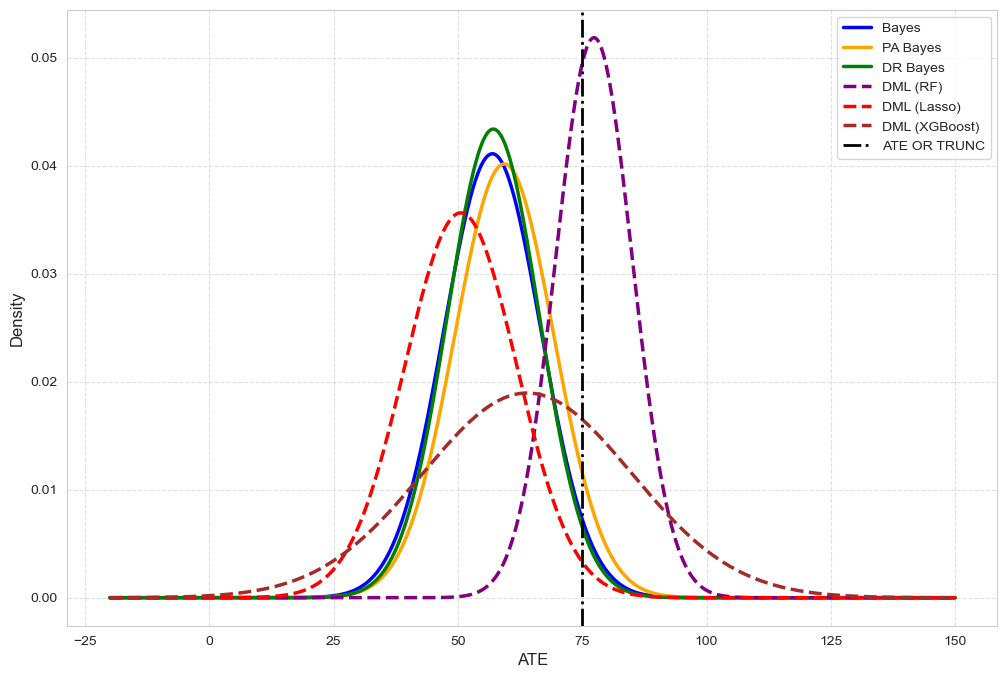

In [6]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Bayesian distributions as density curves
plt.plot(x_values, pdf_bayes, label='Bayes', color='blue', linewidth=2.5)
plt.plot(x_values, pdf_pa_bayes, label='PA Bayes', color='orange', linewidth=2.5)
plt.plot(x_values, pdf_dr_bayes, label='DR Bayes', color='green', linewidth=2.5)

# DML distributions as density curves
plt.plot(x_values, pdf_dml_rf, label='DML (RF)', color='purple', linestyle='--', linewidth=2.5)
plt.plot(x_values, pdf_dml_lasso, label='DML (Lasso)', color='red', linestyle='--', linewidth=2.5)
plt.plot(x_values, pdf_dml_xgb, label='DML (XGBoost)', color='brown', linestyle='--', linewidth=2.5)

# OLS ATE estimate as a vertical dashed line
plt.axvline(ate_or_tr, color='black', linestyle='-.', linewidth=2, label='ATE OR TRUNC')

plt.xlabel('ATE', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()